In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.Points import PlayerPoints, PlayerServes
from utils.Tools import ResumePointsStats,ResumeServeStats, PlotGraph
import numpy as np
import csv

In [2]:
pd.options.display.max_columns = None

# Tratamento

In [3]:
matches = pd.read_csv('charting-m-matches.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE)

In [4]:
H = ['Hard', 'Hard Indoor',
       'Hard ', 'Indoor Hard', 'Hard (indoor)',
       'Hard Court', 'Hard (outdoor)']

C = ['Clay', 'Clay ','Indoor Clay']

In [5]:
# Tratando erros/ agrupando as superficies
matches = matches.dropna(subset=['Surface'])

matches.loc[(matches['Surface'].isin(C)), ['Surface']] = 'Clay'
matches.loc[(matches['Surface'].isin(H)), ['Surface']] = 'Hard'
matches = matches[matches['Surface'] != 'Carpet']

matches['Surface'].unique()

array(['Clay', 'Hard', 'Eva Asderaki-Moore', '3', 'Grass'], dtype=object)

In [6]:
# Filtrando os jogos de cada jogador

Federer_Matches = matches[(matches['Player 1'] == 'Roger Federer') | (matches['Player 2'] == 'Roger Federer')]
Nadal_Matches = matches[(matches['Player 1'] == 'Rafael Nadal') | (matches['Player 2'] == 'Rafael Nadal')]
Djokovic_Matches = matches[(matches['Player 1'] == 'Novak Djokovic') | (matches['Player 2'] == 'Novak Djokovic')]

In [7]:
# Pegando todos os Ids dos jogos de cada jogador

Nadal_Id = Nadal_Matches['match_id'].unique()
Djokovic_Id = Djokovic_Matches['match_id'].unique()
Federer_Id = Federer_Matches['match_id'].unique()

In [8]:
FedererAux = Federer_Matches[['match_id','Player 1', 'Player 2','Surface']]
NadalAux = Nadal_Matches[['match_id','Player 1', 'Player 2','Surface']]
DjokovicAux = Djokovic_Matches[['match_id','Player 1', 'Player 2','Surface']]

In [9]:
#Carregando datasets de pontos

points2010 = pd.read_csv('charting-m-points-2010s.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE, low_memory=False)
points2020 = pd.read_csv('charting-m-points-2020s.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE,  low_memory=False)
points_to_2009 = pd.read_csv('charting-m-points-to-2009.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE,  low_memory=False)

In [12]:
#Juntando todos os pontos em um só dataset

Points = pd.concat([points_to_2009,points2010,points2020],axis=0).reset_index(drop=True)

# Consertando erros de input

In [13]:
# Para cada jogador, retorna todos os pontos disputados em cada um de seus jogos, preservando também
# a ordem "Player 1", "Player 2" e a superficie jogada

Federer_Games_Points = pd.merge(Points,FedererAux, on='match_id')
Nadal_Games_Points = pd.merge(Points,NadalAux, on='match_id')
Djokovic_Games_Points = pd.merge(Points,DjokovicAux, on='match_id')

In [14]:
# Divide os pontos em vencidos/perdidos por cada jogador

Federer_Points_Won, Federer_Points_Lost = PlayerPoints('Roger Federer', Federer_Games_Points, Federer_Id)
Nadal_Points_Won, Nadal_Points_Lost = PlayerPoints('Rafael Nadal', Nadal_Games_Points, Nadal_Id)
Djokovic_Points_Won, Djokovic_Points_Lost = PlayerPoints('Novak Djokovic', Djokovic_Games_Points, Djokovic_Id)

In [18]:
Federer_Points_Won

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,Svr,1st,2nd,Notes,PtWinner,Player 1,Player 2,Surface
0,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,3,0,0,0.0,0.0,30-0,1.0,True,1,4d,5s38s2f+1f3w#,NaN,2,Lorenzo Sonego,Roger Federer,Grass
1,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,6,0,0,1.0,0.0,0-0,2.0,True,2,4+r3n#,NaN,NaN,2,Lorenzo Sonego,Roger Federer,Grass
2,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,7,0,0,1.0,0.0,15-0,2.0,True,2,4+b#,NaN,NaN,2,Lorenzo Sonego,Roger Federer,Grass
3,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,9,0,0,1.0,0.0,30-15,2.0,True,2,6r1d#,NaN,NaN,2,Lorenzo Sonego,Roger Federer,Grass
4,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,10,0,0,1.0,0.0,40-15,2.0,True,2,6+b2d#,NaN,NaN,2,Lorenzo Sonego,Roger Federer,Grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56099,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,109,0,1,3.0,5.0,30-30,19.0,True,1,6b28f1f1b2f1sn#,NaN,NaN,2,Irakli Labadze,Roger Federer,Grass
56100,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,114,0,1,4.0,5.0,0-15,20.0,True,2,4fn#,NaN,NaN,2,Irakli Labadze,Roger Federer,Grass
56101,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,115,0,1,4.0,5.0,15-15,20.0,True,2,c5fw#,NaN,NaN,2,Irakli Labadze,Roger Federer,Grass
56102,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,116,0,1,4.0,5.0,30-15,20.0,True,2,4*,NaN,NaN,2,Irakli Labadze,Roger Federer,Grass


In [15]:
# Divide os pontos em saque/receives para cada jogador

Federer_Serves, Federer_Receives = PlayerServes('Roger Federer', Federer_Games_Points, Federer_Id)
Nadal_Serves, Nadal_Receives = PlayerServes('Rafael Nadal', Nadal_Games_Points, Nadal_Id)
Djokovic_Serves, Djokovic_Receives = PlayerServes('Novak Djokovic', Djokovic_Games_Points, Djokovic_Id)

In [16]:
# Retorna os pontos vencidos nos quais o jogadore estavam no saque

Federer_Serve_Points = Federer_Serves[Federer_Serves['Svr'] == Federer_Serves['PtWinner']]
Nadal_Serve_Points = Nadal_Serves[Nadal_Serves['Svr'] == Nadal_Serves['PtWinner']]
Djokovic_Serve_Points = Djokovic_Serves[Djokovic_Serves['Svr'] == Djokovic_Serves['PtWinner']]

In [19]:
# Retorna os pontos vencidos nos quais o jogador estava recebendo
Federer_Receive_Points = Federer_Receives[Federer_Receives['Svr'] != Federer_Receives['PtWinner']]
Nadal_Receive_Points = Nadal_Receives[Nadal_Receives['Svr'] != Nadal_Receives['PtWinner']]
Djokovic_Receive_Points = Djokovic_Receives[Djokovic_Receives['Svr'] != Djokovic_Receives['PtWinner']]

In [20]:
# Pegando um arquivo 'stats' para exploração, adicionando informação de
# Player 1, Player 2 e superficie

RallyStats = pd.read_csv("charting-m-stats-Rally.csv")

FedererRally = RallyStats[RallyStats['match_id'].isin(Federer_Id)]
NadalRally = RallyStats[RallyStats['match_id'].isin(Nadal_Id)]
DjokovicRally = RallyStats[RallyStats['match_id'].isin(Djokovic_Id)]

FedererRallyStats = pd.merge(FedererRally,FedererAux, on='match_id')
NadalRallyStats = pd.merge(NadalRally,NadalAux, on='match_id')
DjokovicRallyStats = pd.merge(DjokovicRally,DjokovicAux, on='match_id')

In [21]:
NadalRallyStats

,match_id,server,returner,row,pts,pl1_won,pl1_winners,pl1_forced,pl1_unforced,pl2_won,pl2_winners,pl2_forced,pl2_unforced,Player 1,Player 2,Surface
0,20240729-M-Olympics-R32-Novak_Djokovic-Rafael_...,Novak Djokovic,Rafael Nadal,Total,106,63,23,18,15,43,12,15,20,Novak Djokovic,Rafael Nadal,Clay
1,20240729-M-Olympics-R32-Novak_Djokovic-Rafael_...,Novak Djokovic,Rafael Nadal,1-3,50,30,10,7,7,20,3,9,11,Novak Djokovic,Rafael Nadal,Clay
2,20240729-M-Olympics-R32-Novak_Djokovic-Rafael_...,Novak Djokovic,Rafael Nadal,4-6,28,18,5,9,4,10,3,3,4,Novak Djokovic,Rafael Nadal,Clay
3,20240729-M-Olympics-R32-Novak_Djokovic-Rafael_...,Novak Djokovic,Rafael Nadal,7-9,16,11,6,1,2,5,1,2,4,Novak Djokovic,Rafael Nadal,Clay
4,20240729-M-Olympics-R32-Novak_Djokovic-Rafael_...,Novak Djokovic,Rafael Nadal,10,12,4,2,1,2,8,5,1,1,Novak Djokovic,Rafael Nadal,Clay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,20030515-M-Hamburg_Masters-R16-Rafael_Nadal-Ga...,Rafael Nadal,Gaston Gaudio,10-1,9,4,3,1,2,5,1,2,0,Rafael Nadal,Gaston Gaudio,Clay
5038,20030515-M-Hamburg_Masters-R16-Rafael_Nadal-Ga...,Gaston Gaudio,Rafael Nadal,1-3-2,24,22,8,10,1,2,0,0,4,Rafael Nadal,Gaston Gaudio,Clay
5039,20030515-M-Hamburg_Masters-R16-Rafael_Nadal-Ga...,Gaston Gaudio,Rafael Nadal,4-6-2,6,3,1,0,2,3,0,1,2,Rafael Nadal,Gaston Gaudio,Clay
5040,20030515-M-Hamburg_Masters-R16-Rafael_Nadal-Ga...,Gaston Gaudio,Rafael Nadal,7-9-2,7,5,3,1,2,2,0,0,1,Rafael Nadal,Gaston Gaudio,Clay


# Visualização

In [25]:
PtDecision = ['isAce', 'isUnret', 'isRallyWinner',
       'isForced', 'isUnforced', 'isDouble']

SvrStats = ['1stIn', '2ndIn','isDouble']

In [23]:
DataWon = [Federer_Points_Won, Djokovic_Points_Won,Nadal_Points_Won ]

In [26]:
PlotGraph(DataWon,'Clay',PtDecision, 'Won')
PlotGraph(DataWon,'Grass',PtDecision, 'Won')
PlotGraph(DataWon,'Hard',PtDecision, 'Won')


KeyError: 'isAce'

In [21]:
DataLost = [Federer_Points_Lost, Djokovic_Points_Lost , Nadal_Points_Lost ]

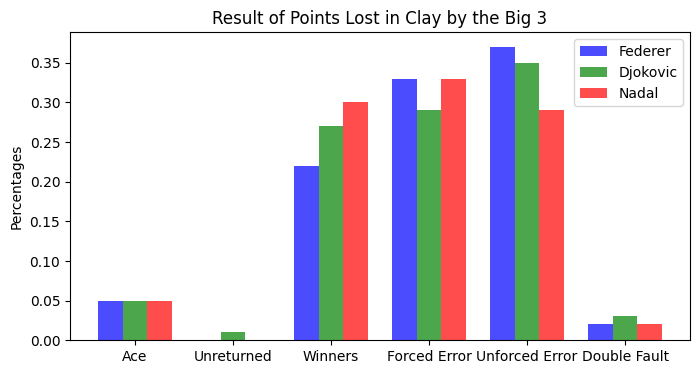

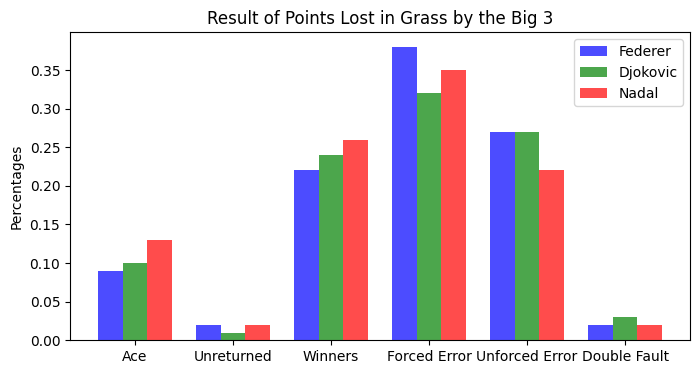

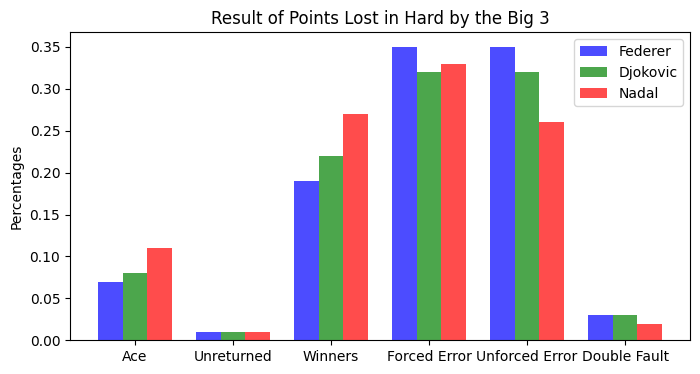

In [22]:
PlotGraph(DataLost,'Clay',PtDecision, 'Lost')
PlotGraph(DataLost,'Grass',PtDecision, 'Lost')
PlotGraph(DataLost,'Hard',PtDecision, 'Lost')

In [23]:
DataServe = [Federer_Serve_Points, Djokovic_Serve_Points , Nadal_Serve_Points ]

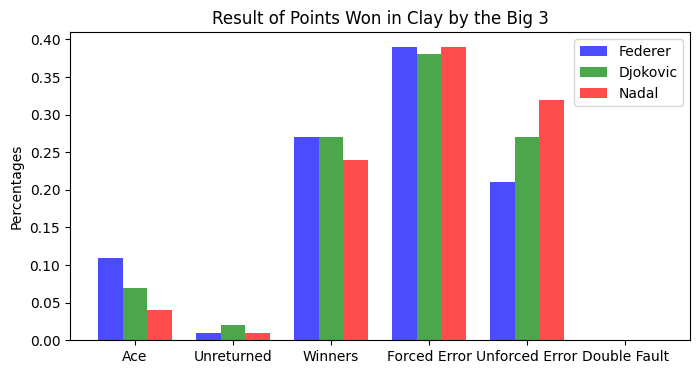

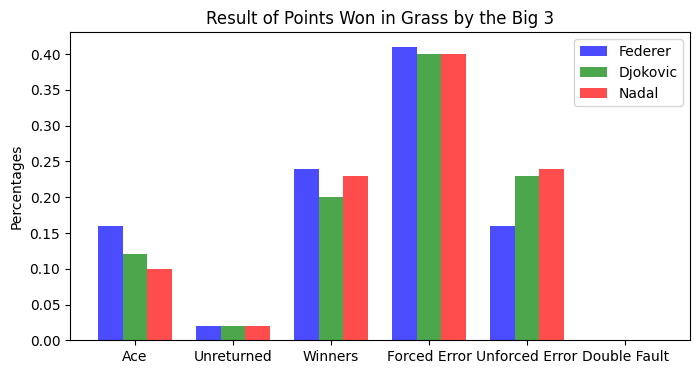

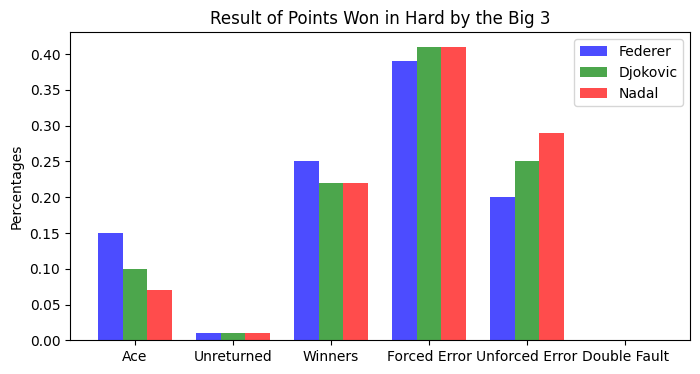

In [25]:
PlotGraph(DataServe,'Clay',PtDecision, 'Won')
PlotGraph(DataServe,'Grass',PtDecision, 'Won')
PlotGraph(DataServe,'Hard',PtDecision, 'Won')

In [26]:
DataReceive = [Federer_Receive_Points, Djokovic_Receive_Points , Nadal_Receive_Points ]

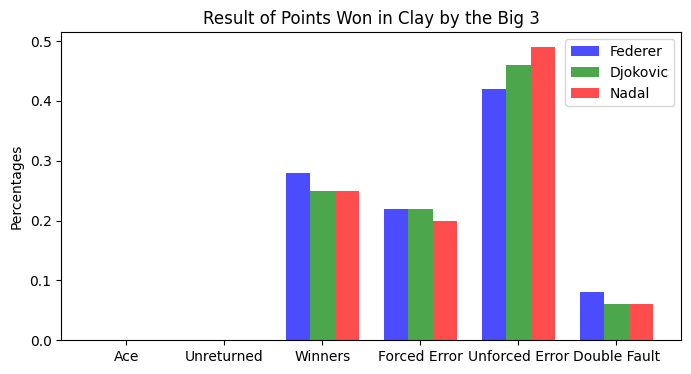

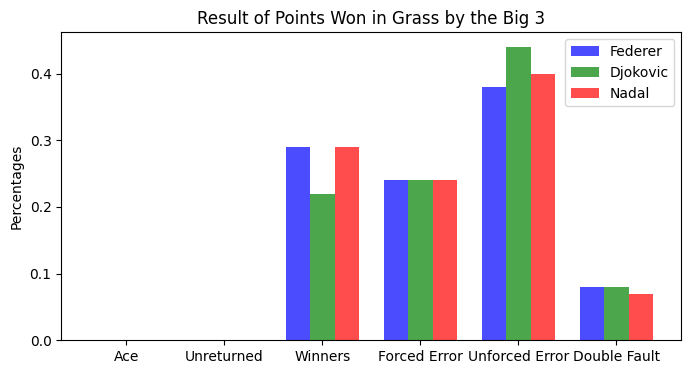

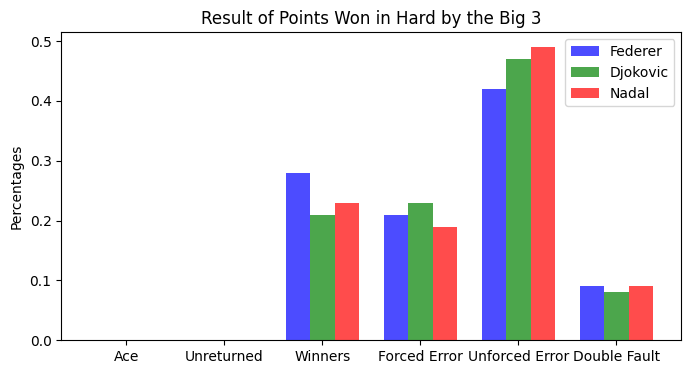

In [31]:
PlotGraph(DataReceive,'Clay',PtDecision, 'Won')
PlotGraph(DataReceive,'Grass',PtDecision, 'Won')
PlotGraph(DataReceive,'Hard',PtDecision, 'Won')